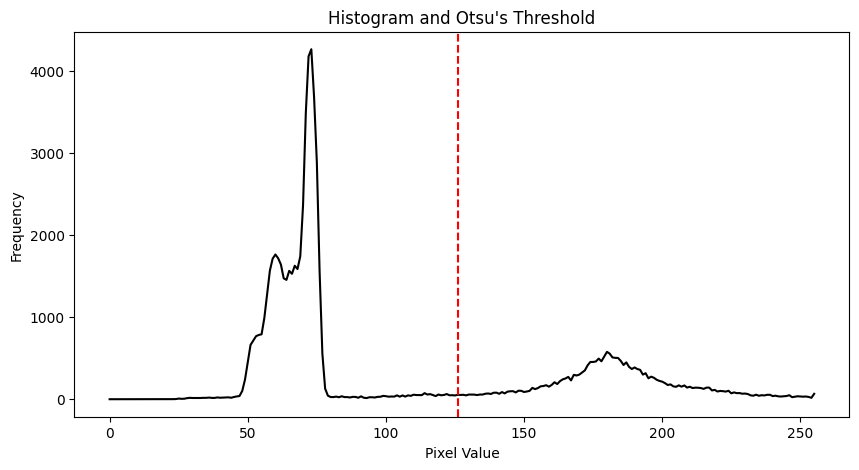

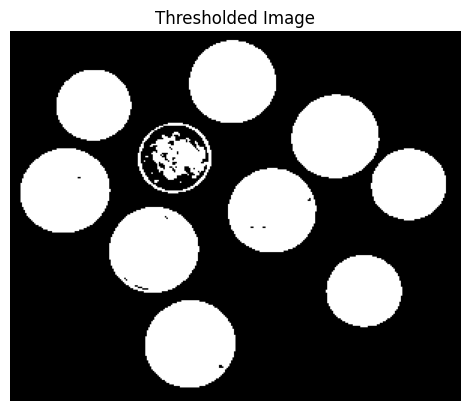

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)

# Calculate histogram
histogram, bins = np.histogram(image.flatten(), 256, [0, 256])

# Otsu's thresholding
_, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display histogram and thresholded image
plt.figure(figsize=(10, 5))
plt.plot(histogram, color='black')
plt.axvline(x=_, color='r', linestyle='--')
plt.title('Histogram and Otsu\'s Threshold')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


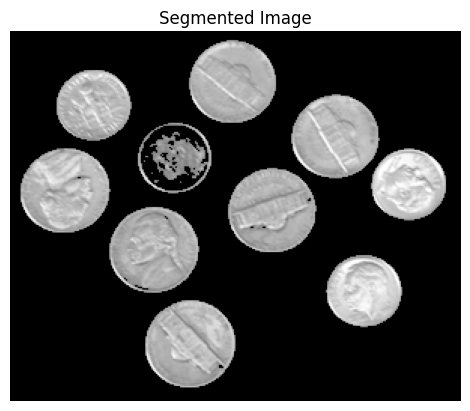

In [3]:
# Display the segmentation results
segmented_image = cv2.bitwise_and(image, thresholded_image)

plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()


In [4]:
# Find contours
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a white background image
result_image = np.ones_like(image) * 255

# Draw contours on the result image
for i, contour in enumerate(contours):
    color = np.random.randint(0, 255, 3)
    cv2.drawContours(result_image, [contour], -1, color, -1)

# Display the result
plt.imshow(result_image)
plt.title('Coin Extraction Results')
plt.axis('off')
plt.show()


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Scalar value for argument 'color' is not numeric
>  - Scalar value for argument 'color' is not numeric


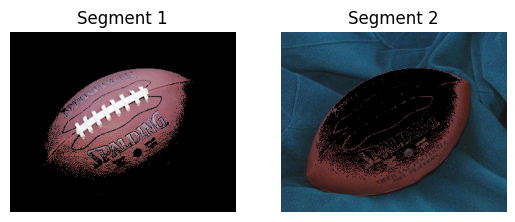

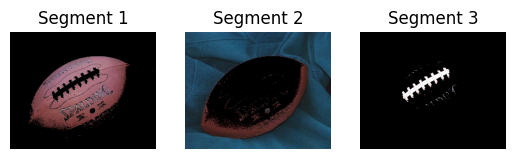

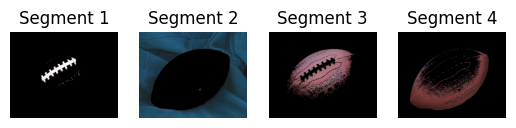

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('football.jpg')

# Reshape the image into a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert to float32
pixels = np.float32(pixels)

# Define criteria for the algorithm
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Number of clusters
k_values = [2, 3, 4]

# Perform k-means clustering for different k values
for k in k_values:
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert the centers back to 8 bit values
    centers = np.uint8(centers)

    # Reshape labels to match image shape
    labels = labels.reshape(image.shape[0], image.shape[1])

    # Create segmented image for each cluster
    segmented_images = []
    for i in range(k):
        segmented_image = np.zeros_like(image)
        segmented_image[labels == i] = image[labels == i]
        segmented_images.append(segmented_image)

    # Display segmented images
    for i, segmented_image in enumerate(segmented_images):
        plt.subplot(1, k, i+1)
        plt.imshow(segmented_image[:, :, ::-1])
        plt.title(f'Segment {i+1}')
        plt.axis('off')
    plt.show()
